In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Perceptron Linear Discriminant and Basic Learning
--------------------------------------------------

From Marsland book, chapter 2, sections 2.2.3 to 2.2.6

Definitions used in the following code for our perceptron units.

- $N$ The number of input patterns 
- $m$ number of input features for our problem, the problems dimensionality
- $n$ number of perceptron units, equivalently the number of output features
- $\mathbf{i}$ The input matrix, a $N \times m$ matrix of $N$ input patterns (rows), each pattern containing $m$ features (columns).  
We actually work with $m+1$ features since we add an extra feature to represent a $-1$ input bias to all the
perceptron units.  The bias input feature will always be in the $0^{th}$ column of the input matrix, thus we will add a column
of $-1$ values to the actual input matrix for processing.
- $\mathbf{w}$ The weight matrix of our perceptron network.  This is a $m \times n$ sized matrix, representing the weights
from each of the $m$ features to each of the $n$ perceptron units.  Each $w_{ij}$ represents the weight from input feature $i$
to perceptron unit $j$.  This matrix should have $m$ rows, one for each feature, and $n$ columns, one for each perceptron unit.
- $\mathbf{y}$ The output vector.  
- $\mathbf{t}$ The target vector.

We compute the activation of each perceptron unit $j$ using the formula:

$\displaystyle y_j = g \bigg( \sum_{i=0}^{m} w_{ij}x_i \bigg) =
   \left\{ 
     \begin{array}{lr} 
       1 & \text{if  } w_{ij} x_i > 0 \\
       0 & \text{if  } w_{ij} x_i \le 0  
     \end{array} 
   \right.
$


In [2]:
def add_bias_features(inputs, bias=-1):
    """A simple convenience method to add a bias feature to a set of input patterns.  This method simply
    adds a column of -1 values to the 0th column of the inputs, and returns the new array.
    
    inputs - A NumPy array of Nxm input patterns
    bias - The value of the bias input feature, defaults to -1
    
    returns - A new NumPy array of inputs, with a column of bias features added as the 0th column
    """
    bias_inputs = np.insert(inputs, 0, bias, axis=1)
    return bias_inputs

In [3]:
def perceptron_recall(inputs, weights):
    """Implement the perceptron/linear discriminat unit recall (output activation) function.  Here we use
    expect two NumPy arrays, representing a set of N input patterns, each with m features, and a weight matrix,
    where each w_ij is the weight from input i to unit j.  Each unit will have m inputs (1 for each feature),
    and there are n total units.  The result is the activaiton of each perceptron unit for each input pattern,
    which will be a Nxn output matrix (the output for each of the N input patterns, from each of the n nodes).
    
    inputs - A Nxm NumPy array.  Rows are input patterns, and columns are the m features of the input we are
       computing with.
    weights - A weight matrix of size mxn, giving the weight w_ij from each input feature i, to each node j.
    
    returns - The activation matrix, a Nxn NumPy array, which are the N activation patterns (rows) for each of the
       n perceptron units.
    """
    activations = np.dot(inputs, weights)
    activations = np.where(activations>0, 1, 0)
    return activations

In [4]:
# simple test of the xor input/output shown in section 2.2.4
# we have N=4 input patterns.  We have 2 features, the xor bits, plus an additional feature, the bias, so m=3
# and we have a single perceptron unit, so n=1
inputs = np.array([[0., 0.],
                   [0., 1.],
                   [1., 0.], 
                   [1., 1.]])
inputs = add_bias_features(inputs)
print "-"*10, "input patterns"
print inputs.shape
print inputs

# Set up weights, we have m=3 features, and n=1 unit
weights = np.array([[-0.05],
                    [-0.02],
                    [0.02]])
print "-"*10, "weights"
print weights.shape
print weights

# simulate activations, shown on page 25
activations = perceptron_recall(inputs, weights)
print "-"*10, "activations"
print activations.shape
print activations

# after first weight update, show activations for input 0, 1 does not fire
weights = np.array([[0.2],
                    [-0.02],
                    [0.02]])
print "-"*10, "weights"
print weights.shape
print weights

activations = perceptron_recall(inputs, weights)
print "-"*10, "activations"
print activations.shape
print activations


---------- input patterns
(4, 3)
[[-1.  0.  0.]
 [-1.  0.  1.]
 [-1.  1.  0.]
 [-1.  1.  1.]]
---------- weights
(3, 1)
[[-0.05]
 [-0.02]
 [ 0.02]]
---------- activations
(4, 1)
[[1]
 [1]
 [1]
 [1]]
---------- weights
(3, 1)
[[ 0.2 ]
 [-0.02]
 [ 0.02]]
---------- activations
(4, 1)
[[0]
 [0]
 [0]
 [0]]


Now we implement the weight update function.  We are using the perceptron learning rule, to update each weight individually
(Marsland, Chapter 2, equation 2.3):

$w_{ij} \leftarrow w_{ij} + \eta(t_j - y_j) \cdot x_i$

In [5]:
def perceptron_weight_update(weights, inputs, targets, eta=0.25):
    """Update the perceptron weights using the perceptron learning rule.
    
    weights - A m rows by n columns NumPy array of weights, from the m features to each of the n units.
    inputs - A Nxm set of input patterns.  We have N input patterns (rows), each input consisting of m features.
    targets - A Nxn set of correct targets, we update the weights based on correct or incorrect targets
    eta - The learning rate
    
    returns - An updates set of weights, modified based on the perceptron weight update/learning rule.
    """
    activations = perceptron_recall(inputs, weights)
    updated_weights = eta * np.dot(np.transpose(inputs), targets - activations)
    return updated_weights

In [6]:
# test the weight update function using examples from pg. 25

# set up inputs and targets
inputs = np.array([[0., 0.],
                   [0., 1.],
                   [1., 0.], 
                   [1., 1.]])
inputs = add_bias_features(inputs)
print "-"*10, "input patterns and targets"
print inputs.shape
print inputs

targets = np.array([[0],
                    [1],
                    [1],
                    [1]])
print targets.shape
print targets

# Set up weights, we have m=3 features, and n=1 unit
weights = np.array([[-0.05],
                    [-0.02],
                    [0.02]])
print "-"*10, "weights"
print weights.shape
print weights


# 
updated_weights = perceptron_weight_update(weights, inputs, targets, eta=0.25)
print "-"*10, "updated weights"
print updated_weights.shape
print updated_weights

---------- input patterns and targets
(4, 3)
[[-1.  0.  0.]
 [-1.  0.  1.]
 [-1.  1.  0.]
 [-1.  1.  1.]]
(4, 1)
[[0]
 [1]
 [1]
 [1]]
---------- weights
(3, 1)
[[-0.05]
 [-0.02]
 [ 0.02]]
---------- updated weights
(3, 1)
[[ 0.25]
 [ 0.  ]
 [ 0.  ]]


Now we will create a class to encapsulate a Perceptron network, and training/testing.

In [7]:
class Perceptron:
    """A class that holds a Perceptron network, and can be used to train and test its performance
    on a set of input data patterns."""
    
    def __init__(self, inputs, targets):
        """"Class constructor, this Perceptron network is doing classic regression, where we want to map
        an arbitrary set of input features to given output targets.  The inputs and targets define the 
        data we are to learn this mapping upon."""
        # keep track of inputs and targets we will train with
        self.inputs = self.add_bias_features(inputs)
        self.targets = targets
        
        # Training consists of N input patterns, of m dimensions
        self.N, self.m = self.inputs.shape
        # number of output units
        _, self.n = self.targets.shape
        
        # create an inital set of random weights for the Perceptron network
        self.weights = self.generate_random_weights(self.m, self.n)
        
    def __repr__(self):
        """Generate a human readable representation of our Perceptron network"""
        r = "Perceptron:\n\n"
        r += "    %d input patterns, %d features, %d output units\n\n" % (self.N, self.m, self.n)
        r += "    Weights:\n" + str(self.weights) + "\n\n"
        r += "    Inputs :\n" + str(self.inputs) + "\n\n"
        r += "    Targets:\n" + str(self.targets) + "\n"
        return r
    
    def add_bias_features(self, inputs, bias=-1):
        """A simple convenience method to add a bias feature to a set of input patterns.  This method simply
        adds a column of -1 values to the 0th column of the inputs, and returns the new array.
        
        inputs - A NumPy array of Nxm input patterns
        bias - The value of the bias input feature, defaults to -1
        
        returns - A new NumPy array of inputs, with a column of bias features added as the 0th column
        """
        bias_inputs = np.insert(inputs, 0, bias, axis=1)
        return bias_inputs
    
    def generate_random_weights(self, m, n):
        """Generate a weight matrix of size mxn of random values.  We generate 
        values in range from -0.05 to 0.05 and return the generated weight matrix"""
        weights = np.random.uniform(-0.05, 0.05, size=(m,n))
        return weights
    
    def activations(self, inputs):
        """Implement the perceptron/linear discriminat unit recall (output activation) function.  We generate
        the activations for our current weights with the N input patterns for our Perceptron network.
        """
        activations = np.dot(inputs, self.weights)
        activations = np.where(activations>0, 1, 0)
        return activations

    def update_weights(self, eta):
        """Update the perceptron weights using the perceptron learning rule.
        """
        activations = self.activations(self.inputs)
        updated_weights = self.weights + eta * np.dot(np.transpose(self.inputs), self.targets - activations)
        return updated_weights
    
    def train(self, eta, max_iterations):
        """Train the network, using eta for the learning rate.  In this simple version, we stop training after
        max_iterations training iterations"""
        for itr in range(max_iterations):
            #print "Iteration:", itr
            self.weights = self.update_weights(eta)
            #print self.weights
            
        #print "Final outputs are:"
        #activations = self.activations(self.inputs)
        #print activations

In [8]:
# test our Perceptron class, and its training
inputs = np.array([[0., 0.],
                   [0., 1.],
                   [1., 0.], 
                   [1., 1.]])
targets = np.array([[0],
                    [1],
                    [1],
                    [1]])

# create class
p = Perceptron(inputs, targets)
p.train(0.25, 5)

In [9]:
# a more difficult test.  We create a set of data at random that is linearly separated, then see if the
# Perceptron network can learn it successfully.
N = 50 # number of patterns to generate
inputs = np.random.random((N, 2))

def classify(inputs):
    """Randomly create a decision boundary, and classify all points based on the boundary"""
    # generate slope/intercept of line at random
    m = np.random.random()
    b = np.random.random()

    # y = mx + b, for x=0.0 and 1.0
    a_x, a_y = 0.0, b
    b_x, b_y = 1.0, m*1.0+b
    
    # compute targets above/below random line using cross product
    targets = ((b_x - a_x) * (inputs[:,1] - a_y) - (b_y - a_y) * (inputs[:,0] - a_x)) > 0
    targets = targets.reshape( (inputs.shape[0], 1) ) * 1.0
    
    return m,b,targets

m,b,targets = classify(inputs)

# create class
p = Perceptron(inputs, targets)
p.train(0.25, 100)


In [10]:
# analyze results
y = p.activations(p.add_bias_features(inputs))
num_correct = np.sum(targets == y)
print "Got %d correct (%0.2f%%)" % (num_correct, 100.0*float(num_correct)/float(N))

Got 50 correct (100.00%)


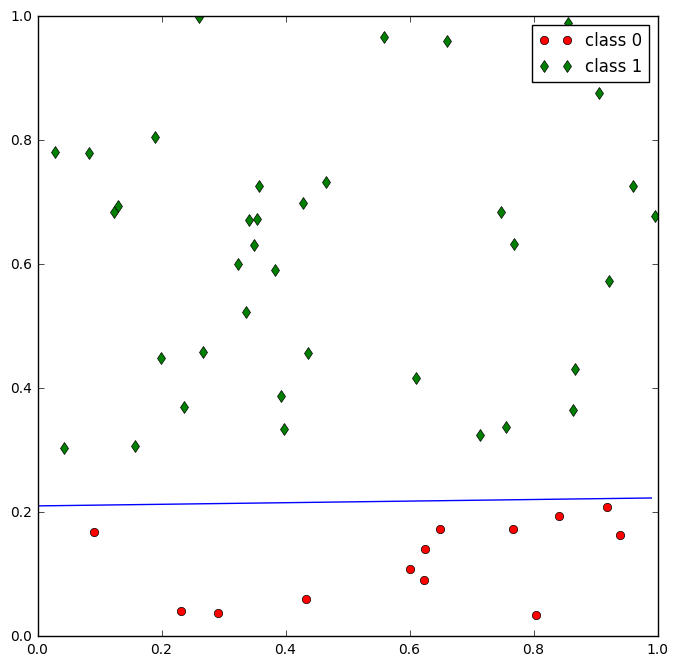

In [11]:
# visualize the decision boundary and the targets
plt.figure(figsize=(8,8))
i1 = np.where(targets==0)[0]
plt.plot(inputs[i1,0], inputs[i1,1], 'ro', label='class 0')
i2 = np.where(targets==1)[0]
plt.plot(inputs[i2,0], inputs[i2,1], 'gd', label='class 1')

x = np.arange(0, 1, 0.01)
y = m*x + b
plt.plot(x, y, 'b-')
plt.legend()

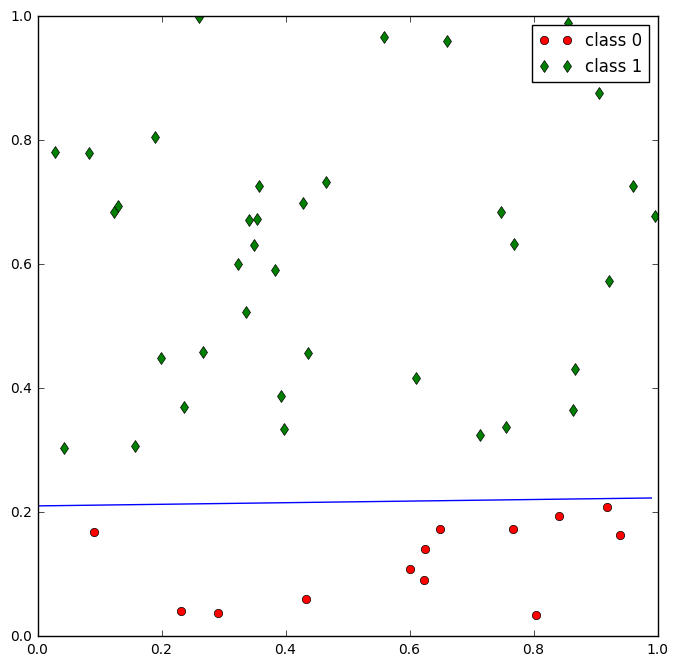

In [12]:
# visualize the output results with the original decision boundary
plt.figure(figsize=(8,8))
y = p.activations(p.add_bias_features(inputs))
i1 = np.where(y==0)[0]
plt.plot(inputs[i1,0], inputs[i1,1], 'ro', label='class 0')
i2 = np.where(y==1)[0]
plt.plot(inputs[i2,0], inputs[i2,1], 'gd', label='class 1')

x = np.arange(0, 1, 0.01)
y = m*x + b
plt.plot(x, y, 'b-')
plt.legend()

In [13]:
# try and plot the boundary, using data covering the whole space
from itertools import product
x = np.arange(0.0, 1.0, 0.01)
y = np.arange(0.0, 1.0, 0.01)
inputs = np.zeros((100*100, 2))
idx = 0
for px,py in product(x, y):
    inputs[idx] = [px, py]
    idx += 1
    
y = p.activations(p.add_bias_features(inputs))


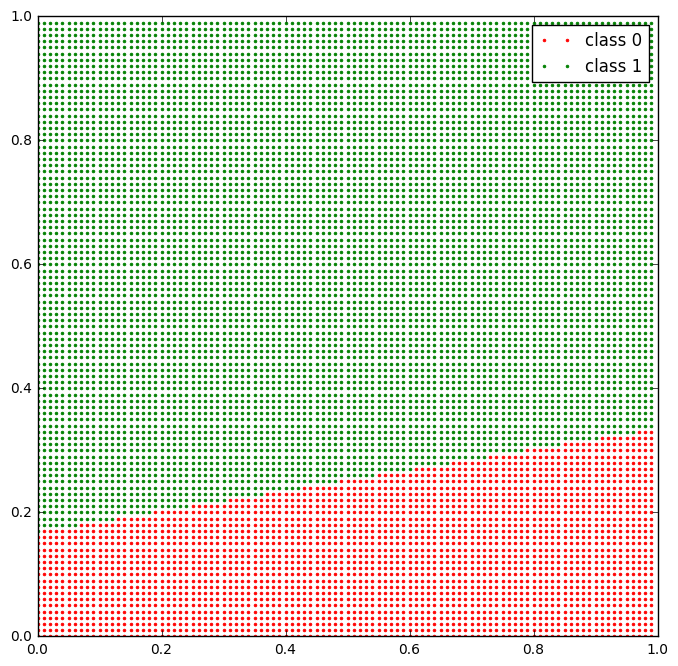

In [14]:
plt.figure(figsize=(8,8))
y = p.activations(p.add_bias_features(inputs))
i1 = np.where(y==0)[0]
plt.plot(inputs[i1,0], inputs[i1,1], 'r.', ms=4, label='class 0')
i2 = np.where(y==1)[0]
plt.plot(inputs[i2,0], inputs[i2,1], 'g.', ms=4, label='class 1')

plt.legend()